In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [147]:
base_dir = 'images/split/training'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.5
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

Found 3600 images belonging to 3 classes.
Found 3600 images belonging to 3 classes.


In [148]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(3, activation='softmax')
])


In [149]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [150]:
from keras.callbacks import Callback

class BaselineEarlyStopping(EarlyStopping):
    def __init__(self, baseline, **kwargs):
        super(BaselineEarlyStopping, self).__init__(**kwargs)
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        # Only stop training if the baseline is reached
        if current >= self.baseline:
            super(BaselineEarlyStopping, self).on_epoch_end(epoch, logs)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

In [151]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
113/113 [==============================] - 81s 714ms/step - loss: 1.2701 - accuracy: 0.4386 - val_loss: 0.6694 - val_accuracy: 0.6633
Epoch 2/50
113/113 [==============================] - 82s 724ms/step - loss: 0.5736 - accuracy: 0.7683 - val_loss: 0.4807 - val_accuracy: 0.8225
Epoch 3/50
113/113 [==============================] - 83s 735ms/step - loss: 0.2525 - accuracy: 0.9133 - val_loss: 0.1986 - val_accuracy: 0.9283
Epoch 4/50
113/113 [==============================] - 83s 734ms/step - loss: 0.1170 - accuracy: 0.9600 - val_loss: 0.0939 - val_accuracy: 0.9731
Epoch 5/50
113/113 [==============================] - 82s 733ms/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 0.0678 - val_accuracy: 0.9753
Epoch 6/50
113/113 [==============================] - 82s 729ms/step - loss: 0.0568 - accuracy: 0.9836 - val_loss: 0.0618 - val_accuracy: 0.9806
Epoch 7/50
113/113 [==============================] - 83s 736ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0565 - val_ac

In [152]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

113/113 [==============================] - 42s 370ms/step - loss: 0.0330 - accuracy: 0.9892
Validation accuracy: 98.92%


['image_0.png', 'image_13.png', 'image_14.png', 'image_4.png', 'image_7.png', 'image_8.png']


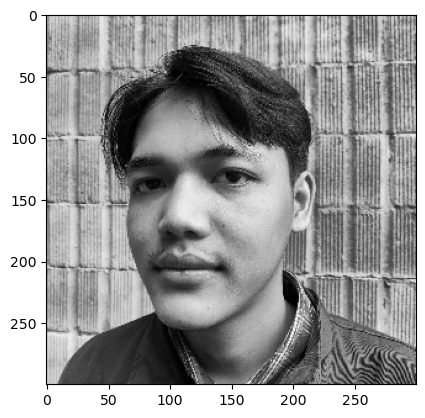

1/1 [==============================] - 0s 27ms/step
Gambar image_0.png diprediksi sebagai: diksa


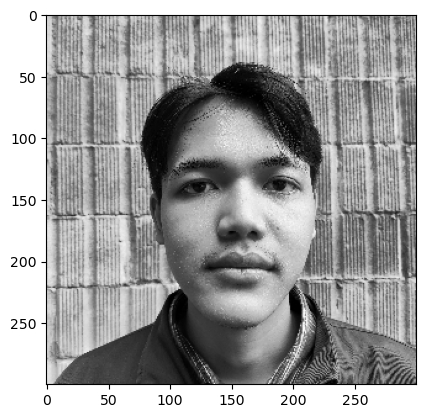

1/1 [==============================] - 0s 16ms/step
Gambar image_13.png diprediksi sebagai: diksa


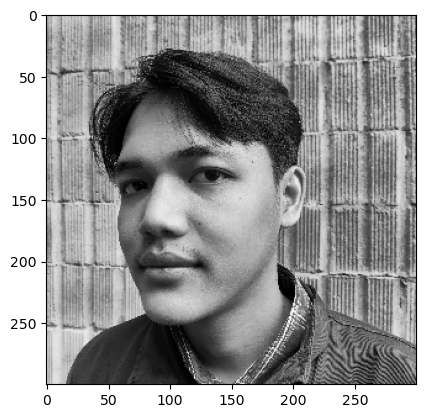

1/1 [==============================] - 0s 14ms/step
Gambar image_14.png diprediksi sebagai: diksa


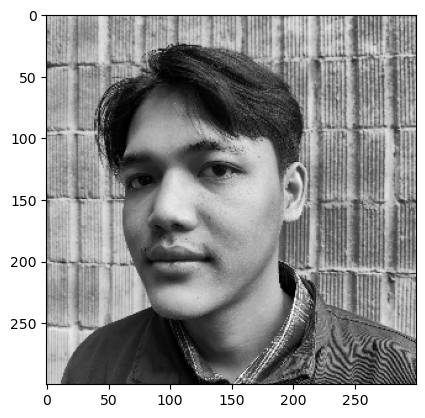

1/1 [==============================] - 0s 13ms/step
Gambar image_4.png diprediksi sebagai: diksa


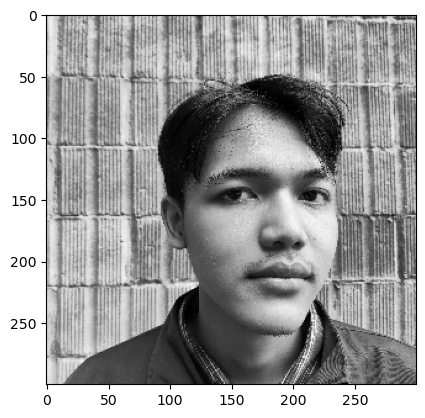

1/1 [==============================] - 0s 17ms/step
Gambar image_7.png diprediksi sebagai: diksa


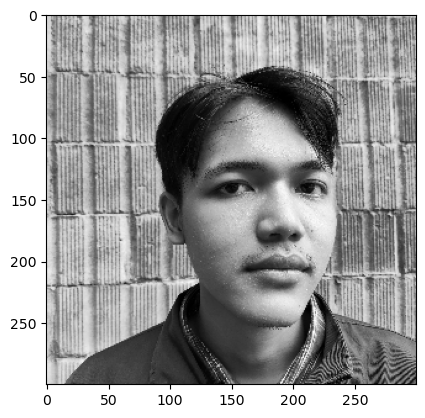

1/1 [==============================] - 0s 16ms/step
Gambar image_8.png diprediksi sebagai: diksa


In [157]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(300, 300), color_mode="grayscale")
    imgplot = plt.imshow(img)
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    predictions = model.predict(img_array)
    classes = ['alif', 'azar', 'diksa']
    predicted_class = classes[np.argmax(predictions)]

    return predicted_class

# Path to the testing images
testing_images_path = 'images/split/testing'

# List all files in the testing images directory
image_files = [f for f in os.listdir(testing_images_path) if os.path.isfile(os.path.join(testing_images_path, f))]

print(image_files)

# Iterate over all files and predict their classes
for image_file in image_files:
    img_path = os.path.join(testing_images_path, image_file)
    predicted_class = predict_uploaded_image(model, img_path)
    print(f'Gambar {image_file} diprediksi sebagai: {predicted_class}')


In [ ]:
img_path = "../images/split/testing/Colin_Powell/image_3.png"

img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
imgplot = plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

predictions = model.predict(img_array)
classes = ['Colin', 'Donald', 'George', 'Gerhard', 'Tony']
predicted_class = classes[np.argmax(predictions)]


print(f'Gambar diprediksi sebagai: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: '../images/split/testing/Colin_Powell/image_3.png'

In [ ]:
# ini adalah testing